In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
start = datetime.now()
from nltk.tokenize import ToktokTokenizer
from wordcloud import WordCloud



In [2]:
file_path = "C:/Users/nadhira/Downloads/pfe/train.csv"
data = pd.read_csv(file_path)
print("The number of comment_text  =",data.shape[0])
print("The number of  labels =",data.shape[1])
print("Time  to run this cell :", datetime.now() - start)
print("\n")
print("**Data example:**")
data.head()

The number of comment_text  = 159571
The number of  labels = 8
Time  to run this cell : 0:00:01.481461


**Data example:**


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [29]:
#show the empty values in the dataset
print(data.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [30]:
#ignore the column of id and text_comment by reindexing the data
Sum_rows= data.iloc[:,2:].sum(axis=1)
No_toxic_comments = (Sum_rows==0).sum(axis=0)

print("Total number of comments = ",len(data))
print("Number of No_toxic_comments = ",No_toxic_comments)
print("Number of toxic comments =",(len(data)-No_toxic_comments))

Total number of comments =  159571
Number of No_toxic_comments =  143346
Number of toxic comments = 16225


In [10]:
print(
    Sum_rows)

0         0
1         0
2         0
3         0
4         0
5         0
6         4
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
159541    3
159542    0
159543    0
159544    0
159545    0
159546    2
159547    0
159548    0
159549    0
159550    0
159551    0
159552    0
159553    0
159554    3
159555    0
159556    0
159557    0
159558    0
159559    0
159560    0
159561    0
159562    0
159563    0
159564    0
159565    0
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64


In [31]:
#List the fields in our dataframe
print(data.dtypes)

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object


In [32]:
# the number of comments in each category
label = data[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
counts = []
for category in label:
    #The append() method add an element to the end of the list
    counts.append((category, data[category].sum()))
df= pd.DataFrame(counts, columns=['category', 'number of comments'])
df

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [33]:
label = data[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
label.head()
counts=[]
for category in label:
    #The append() method add an element to the end of the list
    counts.append((category, data[category].sum()))
print(counts)

[('toxic', 15294), ('severe_toxic', 1595), ('obscene', 8449), ('threat', 478), ('insult', 7877), ('identity_hate', 1405)]


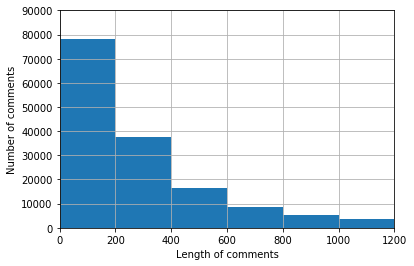

In [34]:
comment = data['comment_text']

x = [len(comment[i]) for i in range(comment.shape[0])]

length = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=length)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()


In [21]:
print(x)

[264, 112, 233, 622, 67, 65, 44, 115, 472, 70, 2875, 56, 319, 819, 219, 610, 57, 48, 118, 440, 266, 58, 543, 97, 1409, 172, 288, 343, 119, 78, 92, 69, 68, 877, 283, 809, 1289, 345, 148, 1191, 216, 198, 648, 40, 319, 813, 93, 109, 696, 1180, 3150, 124, 180, 538, 56, 89, 68, 692, 1798, 360, 112, 299, 33, 986, 172, 311, 120, 151, 204, 218, 195, 338, 65, 1331, 201, 75, 236, 270, 168, 64, 1135, 2749, 516, 295, 109, 113, 73, 47, 338, 26, 809, 497, 75, 87, 527, 554, 55, 136, 174, 264, 96, 177, 84, 408, 103, 42, 897, 647, 139, 200, 96, 51, 669, 414, 1615, 60, 539, 225, 293, 53, 229, 294, 258, 238, 124, 128, 4364, 190, 256, 490, 248, 146, 281, 198, 701, 202, 89, 224, 46, 43, 999, 414, 1971, 321, 114, 683, 64, 195, 493, 386, 719, 554, 60, 462, 105, 244, 154, 365, 245, 99, 3958, 277, 2592, 112, 158, 148, 718, 748, 133, 332, 303, 63, 491, 26, 192, 30, 128, 46, 91, 724, 1239, 53, 53, 306, 149, 164, 130, 93, 271, 220, 304, 375, 273, 77, 89, 262, 211, 649, 541, 112, 658, 379, 110, 336, 666, 350, 607,

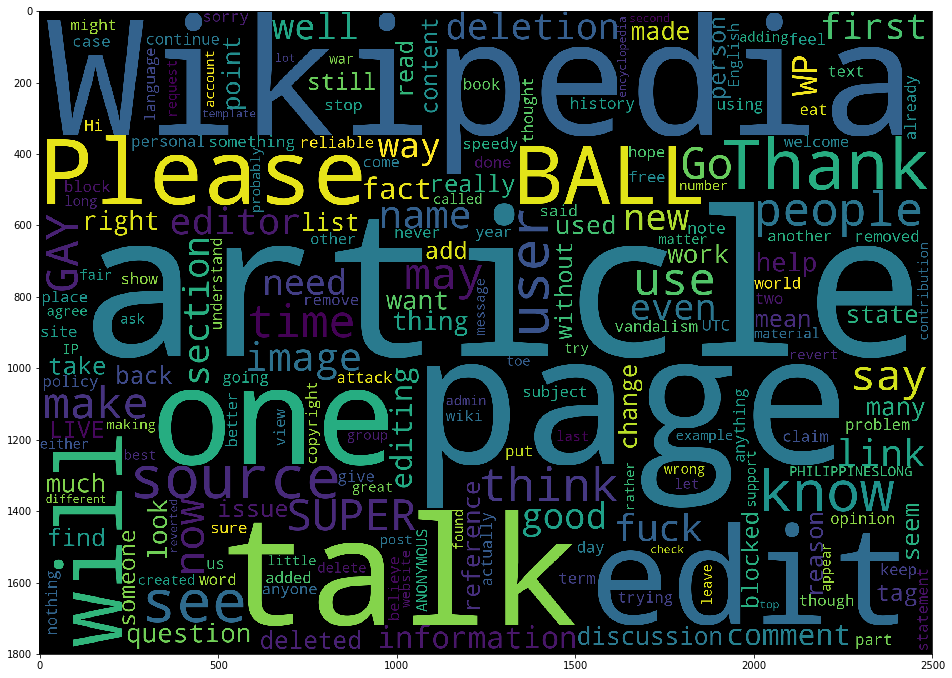

In [73]:
text_total=""
for X in data['comment_text']:
    
    text_total += X
    text_total += " "
#  collocations of two words is false
wordC=WordCloud(background_color='black',collocations=False, width=2500,height=1800).generate(text_total)                        
plt.figure(figsize=(16,12))
plt.imshow(wordC)

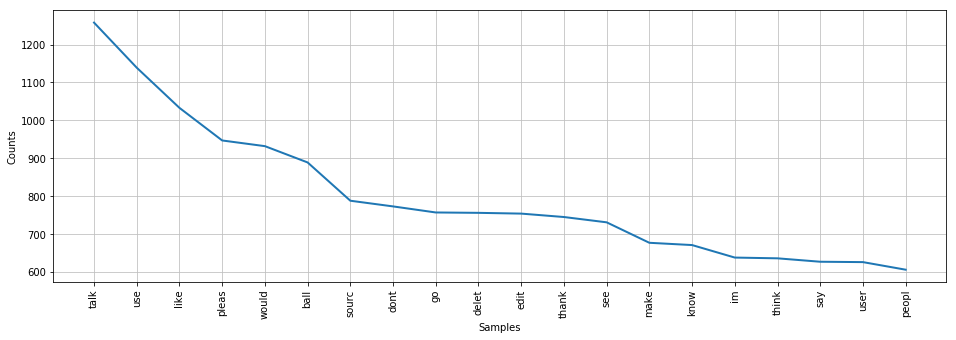

In [79]:
   
x=nltk.FreqDist(ToktokTokenizer().tokenize(text_total))
plt.figure(figsize=(16,5))
x.plot(20)

In [3]:
# shuffling of indices
data = data.reindex(np.random.permutation(data.index))
#resize data
data = data.loc[np.random.choice(data.index, size=5000)]
data.shape

(5000, 8)

In [76]:
data['comment_text'] = data['comment_text'].apply(preprocess_text)
print("Time taken to run this cell :", datetime.now() - start)  
data.head()

Time taken to run this cell : 0:02:15.801191


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
125740,a0a8d4e7045db36a,big homo and,1,0,0,0,0,0
117892,75ce74f1f2def295,tahindenburg influenced camarilla became inc...,0,0,0,0,0,0
30561,512374a1773863f7,particularly version video game articles wp ...,0,0,0,0,0,0
146976,34b717393b60d60b,changes need achieved consensus editors clear...,0,0,0,0,0,0
5569,0ee454e997194378,dare send abuse fucking cockmaster dare warn ...,1,1,1,1,1,0


In [77]:
def snowStemmer(comment):
    comment = comment.split()
    stemm = SnowballStemmer('english')
    words_stemmed = (stemm.stem(Word) for Word in comment)
    comment = " ".join(words_stemmed)
    return comment

In [78]:
data['comment_text'] = data['comment_text'].apply(snowStemmer)
print("Time taken to run this cell :", datetime.now() - start)   
data.head()

Time taken to run this cell : 0:02:50.301186


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
125740,a0a8d4e7045db36a,big homo and,1,0,0,0,0,0
117892,75ce74f1f2def295,tahindenburg influenc camarilla becam increas ...,0,0,0,0,0,0
30561,512374a1773863f7,particular version video game articl wp vg el ...,0,0,0,0,0,0
146976,34b717393b60d60b,chang need achiev consensus editor clear wish ...,0,0,0,0,0,0
5569,0ee454e997194378,dare send abus fuck cockmast dare warn mr jeff...,1,1,1,1,1,0


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(3500, 8)
(1500, 8)


In [6]:
def tokenize(comment):
    out=nltk.word_tokenize(comment)
    return out


In [7]:
""""TfidfVectorizer(input=’content’,
encoding=’utf-8’, decode_error=’strict’, 
strip_accents=None, lowercase=True, preprocessor=None,
tokenizer=None, analyzer=’word’, stop_words=None, token_pattern=’(?u)\b\w\w+\b’, ngram_range=(1, 1),
max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.float64’>, norm=’l2’, 
use_idf=True, smooth_idf=True, sublinear_tf=False)"""

text_train = train['comment_text']
text_test = test['comment_text']
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenize ,min_df=3, max_df=0.9, strip_accents='unicode',use_idf=1, smooth_idf=True, sublinear_tf=1)
vectorizer.fit(text_train)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x000002826C9301E0>, use_idf=1,
        vocabulary=None)

In [14]:
print(x_train)

  (0, 16718)	0.0648462513034386
  (0, 16561)	0.09312336628305182
  (0, 16271)	0.1464516176176046
  (0, 16269)	0.13792542514255715
  (0, 15784)	0.13052589783651827
  (0, 15672)	0.037640123900548925
  (0, 15477)	0.1803866890488739
  (0, 15432)	0.05052663451781515
  (0, 15166)	0.14356840908665294
  (0, 15110)	0.13940945402526317
  (0, 14620)	0.05802142135479978
  (0, 13981)	0.1220623916431876
  (0, 13940)	0.16788219900866488
  (0, 13824)	0.14858156734277764
  (0, 13820)	0.1464516176176046
  (0, 13816)	0.174281638107851
  (0, 12137)	0.18484973472429952
  (0, 11492)	0.08335243618394206
  (0, 11037)	0.06513897801604339
  (0, 10921)	0.19031206117216706
  (0, 10912)	0.07163284609245528
  (0, 10873)	0.17334452545653242
  (0, 10220)	0.16554910305841225
  (0, 10216)	0.0672923638173321
  (0, 9448)	0.1534937812099461
  :	:
  (3499, 11818)	0.24356242260687916
  (3499, 11817)	0.18452810974379774
  (3499, 11167)	0.18416631120727536
  (3499, 11130)	0.08941348334591542
  (3499, 10984)	0.3248770844453127

In [11]:
x_toxic = x_train
means = np.asarray(np.mean(x_toxic, axis=0))
top_ten = np.argsort(-means)[:1]

for ind in range(50):
    print(ind + 1, ":", vectorizer.get_feature_names()[top_ten[0, ind]])

1 : .
2 : the
3 : ,
4 : to
5 : i
6 : you
7 : ``
8 : a
9 : and
10 : of
11 : ''
12 : is
13 : it
14 : that
15 : in
16 : ?
17 : for
18 : )
19 : this
20 : not
21 : :
22 : on
23 : (
24 : !
25 : be
26 : are
27 : do
28 : as
29 : have
30 : your
31 : 's
32 : n't
33 : '' ''
34 : article
35 : was
36 : with
37 : . i
38 : if
39 : `` ''
40 : talk
41 : but
42 : page
43 : my
44 : me
45 : wikipedia
46 : or
47 : from
48 : of the
49 : so
50 : an


In [12]:
means.shape

(1, 18040)

In [9]:
x_train = vectorizer.transform(text_train)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(text_test)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [87]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
def evaluate_score(Y_test,predict): 
    print ('Accuracy:',metrics.accuracy_score(y_test, predictions))
     

In [96]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
classifier.fit(x_train,y_train)
# predict
predictions = classifier.predict(x_test)
print ("Binary Relevance Classifier:")
evaluate_score(y_test,predictions)


Binary Relevance Classifier:
Accuracy: 0.8293333333333334


In [89]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(SVC())
classifier.fit(x_train,y_train)
# predict
predictions = classifier.predict(x_test)
print ("SVC:")
evaluate_score(y_test,predictions)

SVC:
Accuracy: 0.9026666666666666


In [97]:
#create and fit classifier
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
from skmultilearn.problem_transform import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
classifier = ClassifierChain(classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True])
classifier.fit(x_train,y_train)
# predict
predictions = classifier.predict(x_test)
print ("Chain Classifier:")
evaluate_score(y_test,predictions)

Chain Classifier:
Accuracy: 0.9173333333333333


In [98]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())
classifier.fit(x_train,y_train)
# predict
predictions = classifier.predict(x_test)
print ("Label Powerset Classifier:")
evaluate_score(y_test,predictions)

Label Powerset Classifier:
Accuracy: 0.8566666666666667


In [99]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print ("MLKNN Classifier:")
evaluate_score(y_test,predictions_new)

MLKNN Classifier:
Accuracy: 0.8566666666666667


In [100]:
from skmultilearn.adapt import BRkNNaClassifier

classifier = BRkNNaClassifier(k=3)

classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print ("BRKNN Classifier:")
evaluate_score(y_test,predictions)

BRKNN Classifier:
Accuracy: 0.9033333333333333


In [101]:
from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

classifier = MajorityVotingClassifier(
    clusterer = FixedLabelSpaceClusterer(clusters = [[1,3,4], [0, 2, 5]]),
    classifier = ClassifierChain(classifier=GaussianNB())
)
classifier.fit(x_train,y_train)
predictions = classifier.predict(x_test)
print ("MajorityVoting Classifier:")
evaluate_score(y_test,predictions)

MajorityVoting Classifier:
Accuracy: 0.8293333333333334


In [95]:
#save a model and reuse
import pickle
with open('text_classifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)
with open('text_classifier', 'rb') as training_model:  
    model = pickle.load(training_model)
y_pred2 = model.predict(x_test)

#predict
evaluate_score(y_test,y_pred2)
print("Time taken to run this cell :", datetime.now() - start)

Accuracy: 0.8293333333333334
Time taken to run this cell : 3:33:36.502504


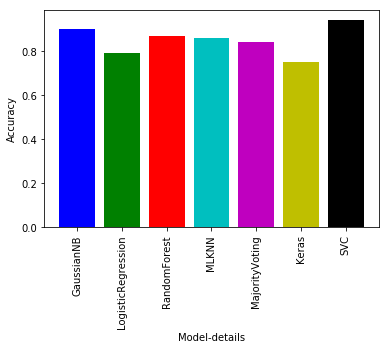

In [236]:
x = ['GaussianNB','LogisticRegression','RandomForest','MLKNN','MajorityVoting','Keras','SVC']
y = [0.90,0.79,0.87,0.86,0.84,0.75,0.94]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Accuracy')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

In [243]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "Model","Featurization", "accuracy",'recall','F1 Score','precision']
x.add_row(["BinaryRelevance", "Tf-idf",0.87,0.44,0.24,0.30])
x.add_row(["LabelPowerset", 'Tf-idf',0.82,0.40,0.24,0.32])
x.add_row(["SVC", 'Tf-idf',0.90,0.40,0.54,0.27])
x.add_row(["ClassifierChain", 'Tf-idf',0.85,0.44,0.31,0.41])
x.add_row(["RandomForestClassifier", 'Tf-idf',0.83,0.40,0.27,0.22])
x.add_row(["MajorityVotingClassifier", 'Tf-idf',0.72,0.40,0.22,0.48])
x.add_row(["MLkNN", 'Tf-idf',0.79,0.44,0.14,0.30])
x.add_row(["Keras", 'Tf-idf',0.74,0.42,0.15,0.34])
x.add_row(["BBRkNNaClassifier",'Tf-idf',0.76,0.48,0.12,0.24])
print(x)

+--------------------------+---------------+----------+--------+----------+-----------+
|          Model           | Featurization | accuracy | recall | F1 Score | precision |
+--------------------------+---------------+----------+--------+----------+-----------+
|     BinaryRelevance      |     Tf-idf    |   0.87   |  0.44  |   0.24   |    0.3    |
|      LabelPowerset       |     Tf-idf    |   0.82   |  0.4   |   0.24   |    0.32   |
|           SVC            |     Tf-idf    |   0.9    |  0.4   |   0.54   |    0.27   |
|     ClassifierChain      |     Tf-idf    |   0.85   |  0.44  |   0.31   |    0.41   |
|  RandomForestClassifier  |     Tf-idf    |   0.83   |  0.4   |   0.27   |    0.22   |
| MajorityVotingClassifier |     Tf-idf    |   0.72   |  0.4   |   0.22   |    0.48   |
|          MLkNN           |     Tf-idf    |   0.79   |  0.44  |   0.14   |    0.3    |
|          Keras           |     Tf-idf    |   0.74   |  0.42  |   0.15   |    0.34   |
|    BBRkNNaClassifier     |    

In [424]:
predictions

<800x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [110]:
doc="shut"
doc=cleaning_text(doc)
doc=snow(doc)
doc=doc.split()
x = vectorizer.transform(doc)
pred=classifier.predict(x)
#pred=pred[0]
print(pred.todense())

[[1 0 0 0 1 1]]


In [117]:
doc="i love u "
doc=cleaning_text(doc)
doc=snow(doc)
doc=doc.split()
x = vectorizer.transform(doc)
pred=classifier.predict(x)
#pred=pred[0]
print(pred.todense())

[[0 0 0 0 0 0]]


In [126]:
doc="i hate u i would like to kill you"
doc=cleaning_text(doc)
doc=snow(doc)
doc=doc.split()
x = vectorizer.transform(doc)
pred=classifier.predict(x)
#pred=pred[0]
print(pred.todense())

[[1 1 1 0 1 1]]
